# EDA 

### 데이터 불러오기

In [412]:
import pandas as pd

import warnings
import matplotlib.pyplot as plt

## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.exceptions import ConvergenceWarning

from sklearn.model_selection import cross_val_score, cross_validate

import seaborn as sns
import numpy as np


# Read in white wine data 
#white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
white = pd.read_csv("winequality-white.csv", sep=';')

# Read in red wine data 
# red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
red = pd.read_csv("winequality-red.csv", sep=';')

# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

### 값 확인

In [413]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [414]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<AxesSubplot:>

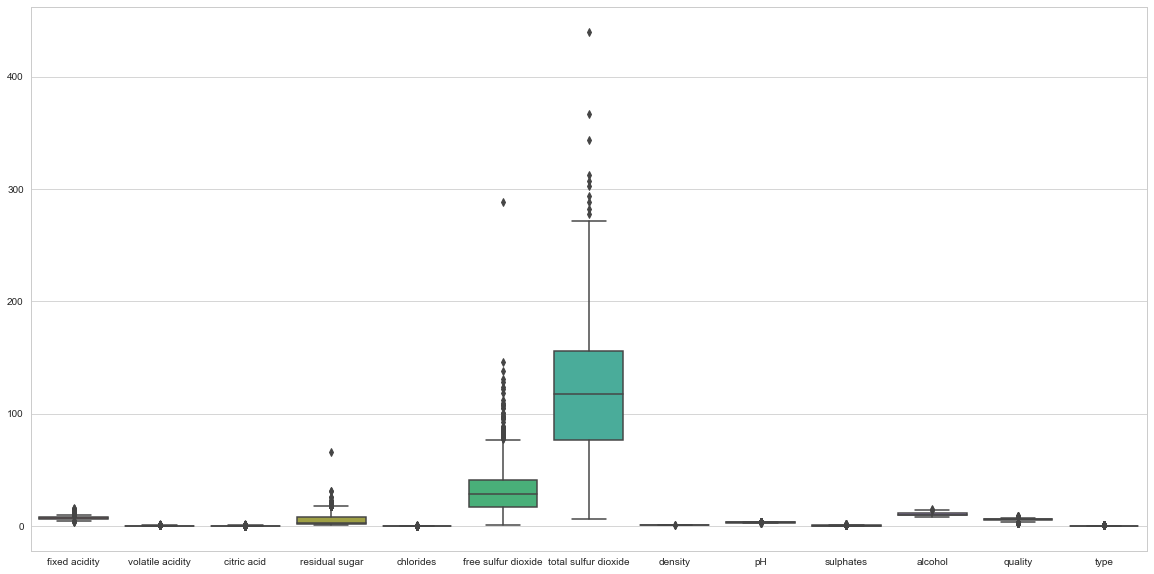

In [415]:
%matplotlib inline
%config Completer.use_jedi = False

plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams["figure.figsize"] = (20,10)

sns.set_style("whitegrid")
sns.boxplot(data = wines) 

### 전처리

<AxesSubplot:>

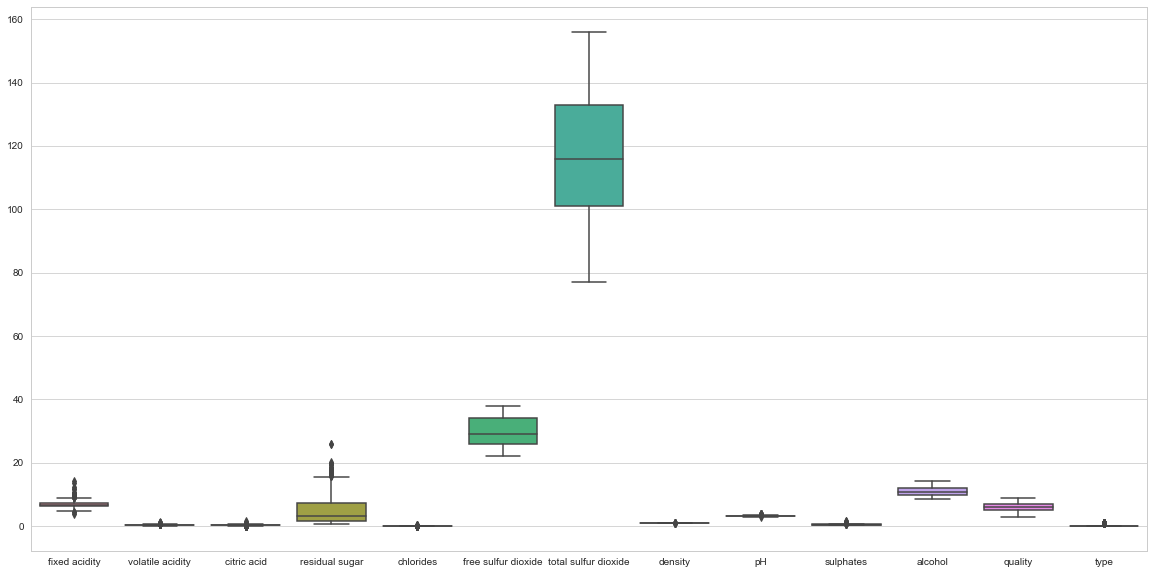

In [416]:
def typeColumnToInt(typeStr):
    if typeStr == "white":
        return 0
    else:
        return 1

#wines = pd.read_csv("train.csv").drop(["id"],axis=1)
#wines.type = wines.type.apply(typeColumnToInt)

#outlier 제거

column_names_for_remove_outliers = ['total sulfur dioxide','free sulfur dioxide']

for column_name in column_names_for_remove_outliers:
    y = wines[column_name]
    removed_outliers = y.between(y.quantile(.25), y.quantile(.75))
    index_names = wines[~removed_outliers].index
    wines.drop(index_names, inplace=True)

sns.boxplot(data=wines)

In [417]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [418]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670 entries, 16 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1670 non-null   float64
 1   volatile acidity      1670 non-null   float64
 2   citric acid           1670 non-null   float64
 3   residual sugar        1670 non-null   float64
 4   chlorides             1670 non-null   float64
 5   free sulfur dioxide   1670 non-null   float64
 6   total sulfur dioxide  1670 non-null   float64
 7   density               1670 non-null   float64
 8   pH                    1670 non-null   float64
 9   sulphates             1670 non-null   float64
 10  alcohol               1670 non-null   float64
 11  quality               1670 non-null   int64  
 12  type                  1670 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 182.7 KB


In [419]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,1
46,7.7,0.935,0.43,2.2,0.114,22.0,114.0,0.9970,3.25,0.73,9.2,5,1
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.9970,3.20,0.56,9.4,5,1
74,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.9984,3.28,0.82,9.6,5,1
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.9972,3.16,1.12,9.1,4,1


### 결측치 확인

In [420]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(dataframe.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(wines)

결측치가 존재하지 않습니다


### 정답 레이블 분포 확인

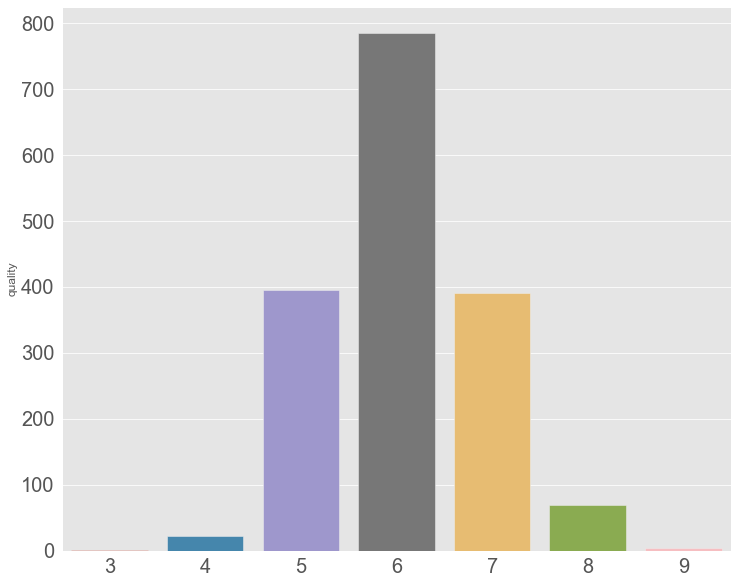

In [421]:
counted_values = wines['quality'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)

### 상관관계 분석

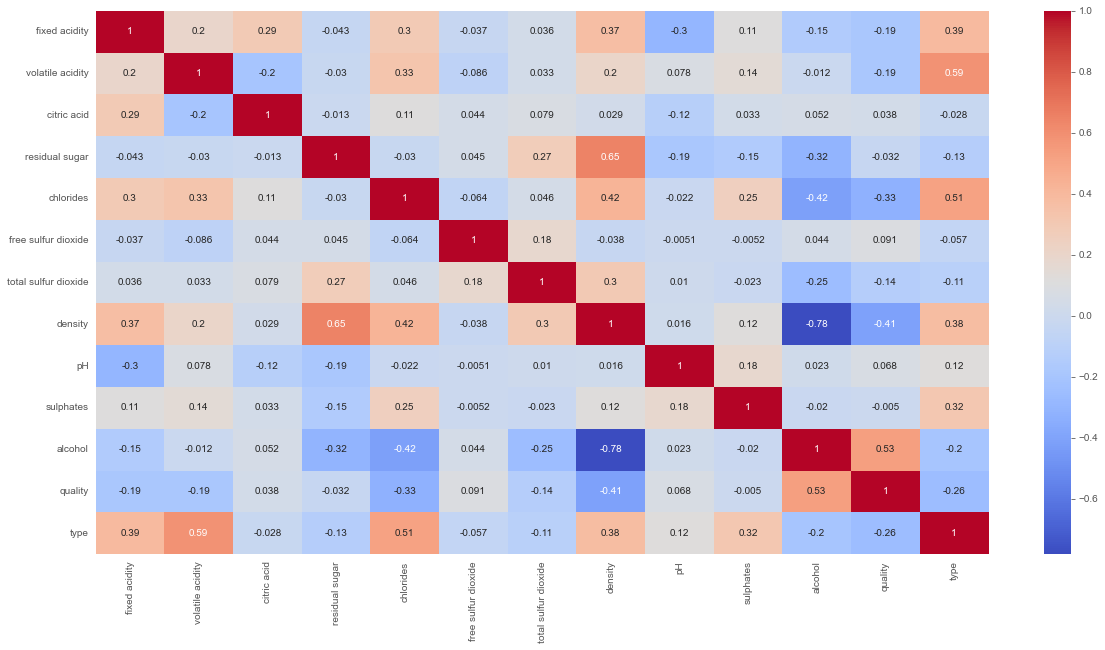

In [422]:
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='coolwarm')
plt.show()

### Train 데이터와 Test 데이터로 나누고, 데이터 확인

In [423]:
wines_copy = wines.copy()

df1 = wines_copy.pop('type') # remove column b and store it in df1
df2 = wines_copy.pop('quality') # remove column x and store it in df2
wines_copy['type']= df1 # add b series as a 'new' column.
wines_copy['quality']= df2 # add b series as a 'new' column.

# Specify the data 
X = wines_copy.iloc[:,0:-1]  # 12 dimensions

# Specify the target labels and flatten the array 
y = np.ravel(wines_copy.quality)

# Split the data up in train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [424]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
2039,6.7,0.22,0.37,1.60,0.028,24.0,102.0,0.99130,3.29,0.59,11.6,0
5247,7.3,0.31,0.25,6.65,0.032,30.0,138.0,0.99244,2.90,0.37,11.1,0
2276,5.8,0.32,0.38,4.75,0.033,23.0,94.0,0.99100,3.42,0.42,11.8,0
2668,6.9,0.20,0.36,1.50,0.031,38.0,147.0,0.99310,3.35,0.56,11.0,0
6241,5.7,0.24,0.30,1.30,0.030,25.0,98.0,0.98968,3.37,0.43,12.4,0


In [405]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
4472,5.8,0.21,0.32,1.6,0.045,38.0,95.0,0.98946,3.23,0.94,12.4,0
4599,6.7,0.18,0.28,10.2,0.039,29.0,115.0,0.99469,3.11,0.45,10.9,0
2569,5.1,0.42,0.01,1.5,0.017,25.0,102.0,0.98940,3.38,0.36,12.3,0
3681,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,0
6341,6.0,0.27,0.32,3.6,0.035,36.0,133.0,0.99215,3.23,0.46,10.8,0


### DecisionTreeClassifier를 이용한 분류

In [406]:
estimator = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 100.0%
Test 정확도 : 62.3%


### DecisionTree 결과 시각화

In [359]:
from sklearn.tree import export_graphviz

# .dot 파일로 export 해줍니다
export_graphviz(estimator, out_file='tree.dot')

# 생성된 .dot 파일을 .png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'decistion-tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot'

### 나이브 베이즈를 통한 예측

In [407]:
estimator = GaussianNB()

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 46.2%
Test 정확도 : 44.2%


### 나이브 베이즈 모델을 file로 저장하고 불러온다. 

In [361]:
import pickle
import joblib

# 모델을 파일에 저장
naive_model_reuslt_filename = 'naive_model.sav'
pickle.dump(estimator, open(naive_model_reuslt_filename, 'wb'))

# 모델을 불러온다. 
loaded_model = pickle.load(open(naive_model_reuslt_filename, 'rb'))

# accuracy를 구한다.
results = loaded_model.predict(x_train)
score_result = loaded_model.score(x_test, y_test)

print("[PREDICT RESULT] {}".format(results))
print("[ACCURACY] {}%".format(round(score_result*100,1)))


[PREDICT RESULT] [7 7 7 ... 6 6 7]
[ACCURACY] 44.2%


### 앙상블 기법을 이용한 예측

In [408]:
estimator = VotingClassifier(estimators=[('lr', LogisticRegression()),
                                         ('kn', KNeighborsClassifier()),
                                         ('dt', DecisionTreeClassifier())], voting='hard', weights=None)

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 78.4%
Test 정확도 : 60.7%


/Users/david/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 랜덤 포레스트를 이용한 예측

In [411]:
estimator = RandomForestClassifier()

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 100.0%
Test 정확도 : 70.3%


<AxesSubplot:>

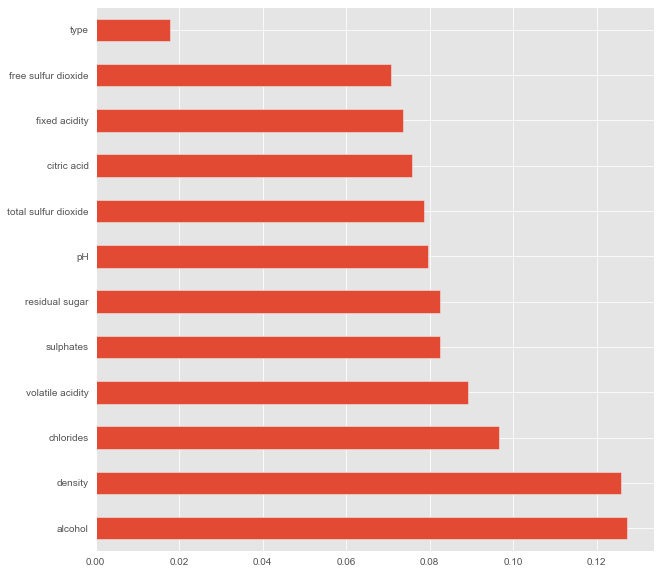

In [315]:
feat_importances = pd.Series(estimator.feature_importances_, index=x_train.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

### GRID SEARCH를 이용한 랜덤 포레스트 모델 하이퍼 파라미터 튜닝

In [288]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [0, 1,2,3,4,5,6,7,8,9,10,11,12],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

/Users/david/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 5}
최고 예측 정확도: 0.6106


/Users/david/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
108 fits failed out of a total of 1404.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/david/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/david/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py", line 384, in fit
    self._validate_estimator()
  File "/Users/david/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py", line 138, in _validate_estimator
    raise

# 결론

산도 및 밀도 등의 센서를 통해 얻은 데이터를 통해 와인의 quality를 예측해본 결과, 90퍼센트 이상의 유의미한 결과가 도출되었으며, 실제 환경에서도 사용할 수 있을 것으로 판단됨. 

Tensorflow lite 모델로 변환하여 모바일 환경에서 이를 